<div style='background-color: dark; padding: 20px'>
<h1 style='color: orange; fontweight: bold'>Produisez une étude de marché avec Python</h1>
<h3 style='color: orange; fontweight: bold'>Notebook I : Préparation, nettoyage et analyse exploratoire des données</h3>
</div>

<div style='background-color: white; padding: 20px'>
<h3 style='color: black; fontweight: bold'><b>La mission</b>:</h3>
<p style='color: black; fontweight: bold'>La poule qui chante, une entreprise française d’agroalimentaire, souhaite se développer à l'international. Il s'agira de de proposer une première analyse des groupements de pays que l’entreprise peut cibler pour exporter ses poulets.<br><br> En partant des données de la FAO (Food and Agriculture Organization), avec la possibilité d'utiliser toutes les données en open data disponibles sur leur site, réaliser une classification ascendante hiérarchique puis effectuer un clustering en utilisant la méthode du K-means et comparer les résultats des deux méthodes. Enfin, réaliser une ACP afin de comprendre les groupes, les liens entre les variables, les liens entre les individus, etc...
</p>
</div>

<div style='background-color: steelblue; padding: 20px'>
<h2 style='color: white; fontweight: bold'>Etape 1 - Chargement et exploration des différents fichiers de données</h2>
</div>

<div style='background-color: white; padding: 20px'>
<h3 style='color: blue; fontweight: bold'>Etape 1.1 - Import des bibliothèques Python nécessaires</h3>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<div style='background-color: white; padding: 20px'>
<h3 style='color: blue; fontweight: bold'>Etape 1.2 - Chargement et exploration du fichier disponibilité alimentaire 2017</h3>
<p style='color: black'></p>
</div>


In [2]:
# Lire et afficher le fichier
donnees_2017 = pd.read_csv('DisponibiliteAlimentaire_2017.csv')
donnees_2017.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [3]:
# Afficher les infos sur le dataframe (nombre de lignes, de colonnes, de valeurs non nulles par colonne, etc)
donnees_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code zone               176600 non-null  int64  
 3   Zone                    176600 non-null  object 
 4   Code Élément            176600 non-null  int64  
 5   Élément                 176600 non-null  object 
 6   Code Produit            176600 non-null  int64  
 7   Produit                 176600 non-null  object 
 8   Code année              176600 non-null  int64  
 9   Année                   176600 non-null  int64  
 10  Unité                   176600 non-null  object 
 11  Valeur                  176600 non-null  float64
 12  Symbole                 176600 non-null  object 
 13  Description du Symbole  176600 non-null  object 
dtypes: float64(1), int64

In [4]:
# Afficher et copier les colonnes
donnees_2017.columns

Index(['Code Domaine', 'Domaine', 'Code zone', 'Zone', 'Code Élément',
       'Élément', 'Code Produit', 'Produit', 'Code année', 'Année', 'Unité',
       'Valeur', 'Symbole', 'Description du Symbole'],
      dtype='object')

In [5]:
# Ne conserver que les colonnes utiles
colonnes = ['Zone', 'Élément', 'Produit', 'Unité', 'Valeur']
donnees_2017  = donnees_2017[colonnes]
donnees_2017.head()

,Zone,Élément,Produit,Unité,Valeur
0,Afghanistan,Production,Blé et produits,Milliers de tonnes,4281.0
1,Afghanistan,Importations - Quantité,Blé et produits,Milliers de tonnes,2302.0
2,Afghanistan,Variation de stock,Blé et produits,Milliers de tonnes,-119.0
3,Afghanistan,Exportations - Quantité,Blé et produits,Milliers de tonnes,0.0
4,Afghanistan,Disponibilité intérieure,Blé et produits,Milliers de tonnes,6701.0


In [6]:
# Ne conserver que les données concernant la viande (de tous types)
donnees_2017_viande = donnees_2017.loc[donnees_2017['Produit'].str.contains('Viande')]
donnees_2017_viande['Produit'].unique()

array(['Viande de Bovins', "Viande d'Ovins/Caprins", 'Viande de Suides',
       'Viande de Volailles', 'Viande, Autre', 'Viande de Anim Aquatiq'],
      dtype=object)

In [7]:
# Afficher les modalités de la colonne Élément
donnees_2017_viande['Élément'].unique()

array(['Production', 'Importations - Quantité', 'Variation de stock',
       'Disponibilité intérieure', 'Pertes', 'Résidus', 'Nourriture',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Exportations - Quantité', 'Autres utilisations (non alimentaire)',
       'Alimentation pour touristes', 'Aliments pour animaux',
       'Traitement', 'Semences'], dtype=object)

In [8]:
# Supprimer les modalités inutiles
donnees_2017_viande = donnees_2017_viande.loc[donnees_2017_viande['Élément'].isin(['Production', 'Importations - Quantité', 'Variation de stock',
                                                                                    'Disponibilité intérieure', 'Pertes', 'Résidus', 'Nourriture',
                                                                                    'Exportations - Quantité', 'Autres utilisations (non alimentaire)',
                                                                                    'Alimentation pour touristes', 'Aliments pour animaux',
                                                                                    'Traitement', 'Semences'])]

In [9]:
# Afficher les différentes unités de mesure de la colonne Unité
# toutes les lignes sont exprimées en milliers de tonnes
donnees_2017_viande['Unité'].unique()

array(['Milliers de tonnes'], dtype=object)

In [10]:
# Convertir les données en tonnes
donnees_2017_viande['Valeur'] = donnees_2017_viande['Valeur'] * 1000

In [11]:
# Afficher le nombre de doublons
donnees_2017_viande.duplicated().sum()

0

In [12]:
# Vérifier qu'il n'y ait pas de répétition de pays, notamment de la Chine
# 'Chine - RAS de Hong-Kong', 'Chine - RAS de Macao', 'Chine, continentale', 'Chine, Taiwan Province de'
# Nous avons 4 modalités au lieu des 5 que l'on trouve parfois, il n'y a pas répétition 
donnees_2017_viande['Zone'].unique()

array(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie', 'Australie', 'Autriche', 'Azerbaïdjan', 'Bahamas',
       'Bangladesh', 'Barbade', 'Bélarus', 'Belgique', 'Belize', 'Bénin',
       'Bolivie (État plurinational de)', 'Bosnie-Herzégovine',
       'Botswana', 'Brésil', 'Bulgarie', 'Burkina Faso', 'Cabo Verde',
       'Cambodge', 'Cameroun', 'Canada', 'Chili',
       'Chine - RAS de Hong-Kong', 'Chine - RAS de Macao',
       'Chine, continentale', 'Chine, Taiwan Province de', 'Chypre',
       'Colombie', 'Congo', 'Costa Rica', "Côte d'Ivoire", 'Croatie',
       'Cuba', 'Danemark', 'Djibouti', 'Dominique', 'Égypte',
       'El Salvador', 'Émirats arabes unis', 'Équateur', 'Espagne',
       'Estonie', 'Eswatini', "États-Unis d'Amérique", 'Éthiopie',
       'Fédération de Russie', 'Fidji', 'Finlande', 'France', 'Gabon',
       'Gambie', 'Géorgie', 'Ghana', 'Grèce', 'Grenade', 'Gu

In [13]:
# Afficher le top des viandes les plus produites dans le monde
# La viande de volaille est la viande la plus produite en 2017 avec 122 millions de tonnes versus 120 millions pour la viande de porc
top_viandes =  donnees_2017_viande.loc[donnees_2017_viande['Élément'] == 'Production'].groupby('Produit')['Valeur'].sum().nlargest()
top_viandes = top_viandes.reset_index()
top_viandes['Produit'].replace({'Viande de Suides': 'Viande de Porc',
        'Viande de Bovins': 'Viande de Boeuf'
        }, inplace=True)
top_viandes

,Produit,Valeur
0,Viande de Volailles,121832000.0
1,Viande de Porc,119616000.0
2,Viande de Boeuf,69114000.0
3,Viande d'Ovins/Caprins,14567000.0
4,"Viande, Autre",5942000.0


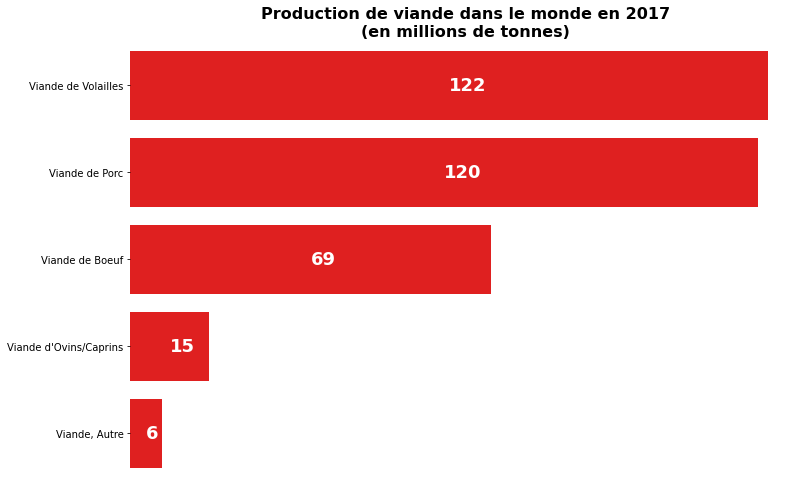

In [14]:
# Afficher la production 2017 à l'aide d'un barplot

# Afficher les données en millions de tonnes et arrondies
top_viandes['Valeur'] = round(top_viandes['Valeur'] / 1000000, 0)
top_viandes['Valeur'] = top_viandes['Valeur'].astype(int)


plt.figure(figsize=(12,8))
barplot = sns.barplot(data=top_viandes,  y='Produit', x='Valeur', orient='h', color='red')
plt.title('Production de viande dans le monde en 2017\n(en millions de tonnes)', fontsize=16, fontweight='bold')

# Ajouter les valeurs dans leurs barres respectives
for p in barplot.patches:
    width = p.get_width()  
    barplot.text(width - width / 2,  
            p.get_y() + p.get_height() / 2,  
            '{:1.0f}'.format(width), 
            ha = 'left',  
            va = 'center', fontsize=18, fontweight='bold', color='white') 

plt.ylabel('')
plt.xlabel('')
barplot.set(xticks=[])  # enlever la graduation sur l'axe des abscisses
sns.despine(left=True, bottom=True) 
plt.show()


In [15]:
# Ne conserver que les données concernant la viande de volaille
donnees_2017_viande_volaille = donnees_2017_viande.loc[donnees_2017_viande['Produit'].str.contains('Viande de Volailles')]
donnees_2017_viande_volaille['Produit'].unique()

array(['Viande de Volailles'], dtype=object)

In [16]:
# Pivoter la colonne Élément pour avoir ses modalités en colonnes 
donnees_2017_viande_volaille = donnees_2017_viande_volaille.pivot_table(index='Zone', columns='Élément', values='Valeur')
donnees_2017_viande_volaille = donnees_2017_viande_volaille.reset_index()
donnees_2017_viande_volaille


Élément,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
0,Afghanistan,NaN,NaN,NaN,57000.0,NaN,29000.0,55000.0,2000.0,28000.0,0.0,NaN,NaN,0.0
1,Afrique du Sud,0.0,NaN,NaN,2118000.0,63000.0,514000.0,2035000.0,83000.0,1667000.0,0.0,NaN,NaN,0.0
2,Albanie,NaN,NaN,NaN,47000.0,0.0,38000.0,47000.0,NaN,13000.0,0.0,NaN,NaN,4000.0
3,Algérie,0.0,NaN,NaN,277000.0,0.0,2000.0,264000.0,13000.0,275000.0,0.0,NaN,NaN,0.0
4,Allemagne,NaN,NaN,NaN,1739000.0,646000.0,842000.0,1609000.0,NaN,1514000.0,-38000.0,NaN,167000.0,-29000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Émirats arabes unis,NaN,NaN,NaN,412000.0,94000.0,433000.0,412000.0,NaN,48000.0,0.0,NaN,NaN,-26000.0
166,Équateur,0.0,NaN,NaN,341000.0,0.0,0.0,324000.0,17000.0,340000.0,0.0,NaN,NaN,-1000.0
167,États-Unis d'Amérique,NaN,NaN,89000.0,18266000.0,3692000.0,123000.0,18100000.0,NaN,21914000.0,0.0,NaN,77000.0,80000.0
168,Éthiopie,0.0,NaN,NaN,14000.0,NaN,1000.0,14000.0,1000.0,14000.0,0.0,NaN,NaN,0.0


In [17]:
# Renommer les colonnes pour plus de clarté
donnees_2017_viande_volaille.rename(columns={'Alimentation pour touristes': 'Alimentation pour touristes (en tonnes)',
                                             'Aliments pour animaux': 'Alimentation pour animaux (en tonnes)',
                                             'Autres utilisations (non alimentaire)': 'Autres utilisations (en tonnes)',
                                             'Disponibilité intérieure': 'Disponibilité intérieure (en tonnes)',
                                             'Exportations - Quantité': 'Exportations (en tonnes)',
                                             'Importations - Quantité': 'Importations (en tonnes)',
                                             'Nourriture': 'Alimentation humaine (en tonnes)',
                                             'Pertes': 'Pertes (en tonnes)',
                                             'Production': 'Production (en tonnes)',
                                             'Résidus': 'Résidus (en tonnes)',
                                             'Semences': 'Semences (en tonnes)',
                                             'Traitement': 'Transformés (en tonnes)',
                                             'Variation de stock': 'Variation de stock (en tonnes)'
                                             }, inplace=True)
donnees_2017_viande_volaille.head()

Élément,Zone,Alimentation pour touristes (en tonnes),Alimentation pour animaux (en tonnes),Autres utilisations (en tonnes),Disponibilité intérieure (en tonnes),Exportations (en tonnes),Importations (en tonnes),Alimentation humaine (en tonnes),Pertes (en tonnes),Production (en tonnes),Résidus (en tonnes),Semences (en tonnes),Transformés (en tonnes),Variation de stock (en tonnes)
0,Afghanistan,NaN,NaN,NaN,57000.0,NaN,29000.0,55000.0,2000.0,28000.0,0.0,NaN,NaN,0.0
1,Afrique du Sud,0.0,NaN,NaN,2118000.0,63000.0,514000.0,2035000.0,83000.0,1667000.0,0.0,NaN,NaN,0.0
2,Albanie,NaN,NaN,NaN,47000.0,0.0,38000.0,47000.0,NaN,13000.0,0.0,NaN,NaN,4000.0
3,Algérie,0.0,NaN,NaN,277000.0,0.0,2000.0,264000.0,13000.0,275000.0,0.0,NaN,NaN,0.0
4,Allemagne,NaN,NaN,NaN,1739000.0,646000.0,842000.0,1609000.0,NaN,1514000.0,-38000.0,NaN,167000.0,-29000.0


In [18]:
# Afficher les dimensions du dataframe
donnees_2017_viande_volaille.shape

(170, 14)

In [19]:
# Afficher le nombre de valeus manquantes par colonne
donnees_2017_viande_volaille.isna().sum()

Élément
Zone                                         0
Alimentation pour touristes (en tonnes)     92
Alimentation pour animaux (en tonnes)      169
Autres utilisations (en tonnes)            136
Disponibilité intérieure (en tonnes)         0
Exportations (en tonnes)                    35
Importations (en tonnes)                     0
Alimentation humaine (en tonnes)             0
Pertes (en tonnes)                         103
Production (en tonnes)                       2
Résidus (en tonnes)                          6
Semences (en tonnes)                       169
Transformés (en tonnes)                    124
Variation de stock (en tonnes)               1
dtype: int64

<div style='background-color: white; padding: 20px'>
<p style='color: red; fontweight: bold'>On constate que l'on a énormément de valeurs manquantes dans certaines colonnes, bien que les colonnes les plus pertinentes pour l'analyse soient relativement épargnées. Mais surtout, les données datent de 2017 et concernent la viande de volaille qui englobe également la viande de dinde, de canard, de pintade, etc. Or nous voulons exporter des poulets, de la viande de poulet. De plus, nous avons les données d'exportations / importations mais nous ne conaissons pas les pays de destination et ou d'origine. Et nous n'avons pas de données macroéconomiques. <br><b>Il serait donc judicieux d'aller sur le site de la FAO pour télécharger / créer un jeu de données plus spécifiques et plus récentes, c'est à dire avec des données sur le commerce et la consommation de viande de poulet (et uniquement de viande de poulet). On aimerait également connaître les pays qui font du commerce de viande de poulet avec la France</b>.</p>
</div>

<div style='background-color: white; padding: 20px'>
<h3 style='color: blue; fontweight: bold'>Etape 1.3 - Chargement et exploration des données concernant l'exportation et l'importation de viande de poulet vers ou depuis la France en 2021</h3>
<p style='color: black'>téléchargés depuis le site de la FAO: https://www.fao.org/faostat/fr/#data/TM</p>
</div>


In [20]:
# Lire le fichier sur les exportations / importations de viande de poulet entre les pays du monde et la France puis l'afficher
# La colonne "Pays partenaires" ne contient qu'une seule modalité, la France.
exportations_importations_viande_poulet_2021 = pd.read_csv('Exportations_importations_viande_poulet_2021_vers_depuis_France_FAOSTAT.csv')
exportations_importations_viande_poulet_2021.head()

,Code Domaine,Domaine,Code pays déclarant (M49),Pays déclarants,Code pays partenaire (M49),Pays partenaires,Code Élément,Élément,Code Produit (CPC),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,TM,Matrices du commerce détaillées,710,Afrique du Sud,250,France,5610,Importations - Quantité,21121,"Viande, poulet, fraîche ou réfrigérée",2021,2021,tonnes,25.20,A,Chiffre officiel
1,TM,Matrices du commerce détaillées,710,Afrique du Sud,250,France,5622,Importations - Valeur,21121,"Viande, poulet, fraîche ou réfrigérée",2021,2021,1000 US$,34.00,A,Chiffre officiel
2,TM,Matrices du commerce détaillées,276,Allemagne,250,France,5610,Importations - Quantité,21121,"Viande, poulet, fraîche ou réfrigérée",2021,2021,tonnes,41537.97,A,Chiffre officiel
3,TM,Matrices du commerce détaillées,276,Allemagne,250,France,5622,Importations - Valeur,21121,"Viande, poulet, fraîche ou réfrigérée",2021,2021,1000 US$,107664.00,A,Chiffre officiel
4,TM,Matrices du commerce détaillées,276,Allemagne,250,France,5910,Exportations - Quantité,21121,"Viande, poulet, fraîche ou réfrigérée",2021,2021,tonnes,24034.66,A,Chiffre officiel


In [21]:
# Afficher les dimensions du dataframe
exportations_importations_viande_poulet_2021.shape

(266, 16)

In [22]:
# Afficher le nombre de valeurs non nulles et le type de données pour chaque colonne
exportations_importations_viande_poulet_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Code Domaine                266 non-null    object 
 1   Domaine                     266 non-null    object 
 2   Code pays déclarant (M49)   266 non-null    int64  
 3   Pays déclarants             266 non-null    object 
 4   Code pays partenaire (M49)  266 non-null    int64  
 5   Pays partenaires            266 non-null    object 
 6   Code Élément                266 non-null    int64  
 7   Élément                     266 non-null    object 
 8   Code Produit (CPC)          266 non-null    int64  
 9   Produit                     266 non-null    object 
 10  Code année                  266 non-null    int64  
 11  Année                       266 non-null    int64  
 12  Unité                       266 non-null    object 
 13  Valeur                      266 non

In [23]:
# Afficher les colonnes du dataframe
exportations_importations_viande_poulet_2021.columns

Index(['Code Domaine', 'Domaine', 'Code pays déclarant (M49)',
       'Pays déclarants', 'Code pays partenaire (M49)', 'Pays partenaires',
       'Code Élément', 'Élément', 'Code Produit (CPC)', 'Produit',
       'Code année', 'Année', 'Unité', 'Valeur', 'Symbole',
       'Description du Symbole'],
      dtype='object')

In [24]:
# Supprimer les colonnes superflues (y compris la colonne produit qui ne contient que la modalité "Viande, poulet, fraîche et réfrigérée", 
# puis afficher le dataframe
exportations_importations_viande_poulet_2021 = exportations_importations_viande_poulet_2021.drop(columns=['Code Domaine', 'Domaine', 'Code pays déclarant (M49)', 
                                                                                                          'Code pays partenaire (M49)', 'Pays partenaires', 'Code Élément', 
                                                                                                          'Code Produit (CPC)', 'Produit', 'Code année', 
                                                                                                          'Année', 'Symbole', 'Description du Symbole'])
exportations_importations_viande_poulet_2021.head()

,Pays déclarants,Élément,Unité,Valeur
0,Afrique du Sud,Importations - Quantité,tonnes,25.20
1,Afrique du Sud,Importations - Valeur,1000 US$,34.00
2,Allemagne,Importations - Quantité,tonnes,41537.97
3,Allemagne,Importations - Valeur,1000 US$,107664.00
4,Allemagne,Exportations - Quantité,tonnes,24034.66


In [25]:
# Afficher les différentes unités de la colonne Unité
# On constate que toutes les lignes sont exprimées en milliers de US$ lorsqu'il s'agit d'un montant et en tonnes lorsqu'il est question de quantité
exportations_importations_viande_poulet_2021['Unité'].unique()

array(['tonnes', '1000 US$'], dtype=object)

In [26]:
# Pivoter la colonne Élément de façon à avoir ses modalités en colonnes
exportations_importations_viande_poulet_2021 = exportations_importations_viande_poulet_2021.pivot_table(index='Pays déclarants', columns='Élément', values=['Unité', 'Valeur'])
exportations_importations_viande_poulet_2021 = exportations_importations_viande_poulet_2021.reset_index()
exportations_importations_viande_poulet_2021

Pays déclarants                  Valeur                        \
Élément                        Exportations - Quantité Exportations - Valeur   
0               Afrique du Sud                     NaN                   NaN   
1                    Allemagne                24034.66               91204.0   
2                       Angola                     NaN                   NaN   
3              Arabie saoudite                   54.00                  63.0   
4                      Arménie                     NaN                   NaN   
..                         ...                     ...                   ...   
97                       Yémen                     NaN                   NaN   
98                      Zambie                     NaN                   NaN   
99         Émirats arabes unis                     NaN                   NaN   
100      États-Unis d'Amérique                  271.03                 297.0   
101                   Éthiopie                     NaN                   NaN   

                                                       
Élément Importations - Quantité Importations - Valeur  
0                         25.20                  34.0  
1                      41537.97              107664.0  
2                        380.57                 456.0  
3                      57316.69              104389.0  
4                        261.03                 219.0  
..                          ...                   ...  
97                      3618.90                6112.0  
98                       134.54                 108.0  
99                      5423.79               11517.0  
100                         NaN                   NaN  
101                       21.75                  25.0  

[102 rows x 5 columns]

In [27]:
# Afficher les données pour les deux pays les plus peuplés de la planète
# Nous n'avons pas de données pour l'Inde. Quant à la Chine, les données d'exportations sont manquantes et on remarque
# que le pays importe très peu de viande de poulet.
exportations_importations_viande_poulet_2021.loc[(exportations_importations_viande_poulet_2021['Pays déclarants'].str.contains('Inde')) 
                                                | (exportations_importations_viande_poulet_2021['Pays déclarants'].str.contains('Chine'))]

Pays déclarants                  Valeur  \
Élément                           Exportations - Quantité   
21       Chine - RAS de Hong-Kong                     NaN   
22           Chine - RAS de Macao                     NaN   
23            Chine, continentale                     NaN   

                                                                             
Élément Exportations - Valeur Importations - Quantité Importations - Valeur  
21                        NaN                 3596.32                7973.0  
22                        NaN                   87.51                 330.0  
23                        NaN                   50.40                 193.0

In [28]:
# Afficher les colonnes du dataframe
# On a un multiIndex
exportations_importations_viande_poulet_2021.columns

MultiIndex([('Pays déclarants',                        ''),
            (         'Valeur', 'Exportations - Quantité'),
            (         'Valeur',   'Exportations - Valeur'),
            (         'Valeur', 'Importations - Quantité'),
            (         'Valeur',   'Importations - Valeur')],
           names=[None, 'Élément'])

In [29]:
# Supprimer le multiIndex
colonnes = [' '.join(col).strip() for col in exportations_importations_viande_poulet_2021.columns.values]

# Remplacer les colonnes du DataFrame par la liste
exportations_importations_viande_poulet_2021.columns = colonnes
exportations_importations_viande_poulet_2021.head()

,Pays déclarants,Valeur Exportations - Quantité,Valeur Exportations - Valeur,Valeur Importations - Quantité,Valeur Importations - Valeur
0,Afrique du Sud,NaN,NaN,25.20,34.0
1,Allemagne,24034.66,91204.0,41537.97,107664.0
2,Angola,NaN,NaN,380.57,456.0
3,Arabie saoudite,54.00,63.0,57316.69,104389.0
4,Arménie,NaN,NaN,261.03,219.0


In [30]:
# Diviser des colonnes par 1000 pour avoir des données exprimées en millions de US$
exportations_importations_viande_poulet_2021['Valeur Exportations - Valeur'] = exportations_importations_viande_poulet_2021['Valeur Exportations - Valeur'] / 1000
exportations_importations_viande_poulet_2021['Valeur Importations - Valeur'] = exportations_importations_viande_poulet_2021['Valeur Importations - Valeur'] / 1000

In [31]:
# Renommer les colonnes "Valeur ..." et Pays déclarants pour plus de clarté
exportations_importations_viande_poulet_2021 = exportations_importations_viande_poulet_2021.rename(columns={'Valeur Exportations - Quantité': 'Exportations viande de poulet vers la France (en tonnes)',
                                                             'Valeur Exportations - Valeur': 'Exportations viande de poulet vers la France (en millions de US$)',
                                                             'Valeur Importations - Quantité': 'Importations viande de poulet depuis la France (en tonnes)',
                                                             'Valeur Importations - Valeur': 'Importations viande de poulet depuis la France (en millions de US$)', 
                                                             'Pays déclarants': 'Zone'})
exportations_importations_viande_poulet_2021

,Zone,Exportations viande de poulet vers la France (en tonnes),Exportations viande de poulet vers la France (en millions de US$),Importations viande de poulet depuis la France (en tonnes),Importations viande de poulet depuis la France (en millions de US$)
0,Afrique du Sud,NaN,NaN,25.20,0.034
1,Allemagne,24034.66,91.204,41537.97,107.664
2,Angola,NaN,NaN,380.57,0.456
3,Arabie saoudite,54.00,0.063,57316.69,104.389
4,Arménie,NaN,NaN,261.03,0.219
...,...,...,...,...,...
97,Yémen,NaN,NaN,3618.90,6.112
98,Zambie,NaN,NaN,134.54,0.108
99,Émirats arabes unis,NaN,NaN,5423.79,11.517
100,États-Unis d'Amérique,271.03,0.297,NaN,NaN


In [32]:
# Afficher le nombre de valeurs non nulles dans chaque colonne
# On constate que les colonnes Exportations contiennent beaucoup trop de valeurs manquantes
exportations_importations_viande_poulet_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 5 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Zone                                                                 102 non-null    object 
 1   Exportations viande de poulet vers la France (en tonnes)             35 non-null     float64
 2   Exportations viande de poulet vers la France (en millions de US$)    35 non-null     float64
 3   Importations viande de poulet depuis la France (en tonnes)           98 non-null     float64
 4   Importations viande de poulet depuis la France (en millions de US$)  98 non-null     float64
dtypes: float64(4), object(1)
memory usage: 4.1+ KB


In [33]:
# On supprime ces deux colonnes
exportations_importations_viande_poulet_2021.drop(columns=['Exportations viande de poulet vers la France (en tonnes)', 'Exportations viande de poulet vers la France (en millions de US$)'], inplace=True)
exportations_importations_viande_poulet_2021.head()

,Zone,Importations viande de poulet depuis la France (en tonnes),Importations viande de poulet depuis la France (en millions de US$)
0,Afrique du Sud,25.20,0.034
1,Allemagne,41537.97,107.664
2,Angola,380.57,0.456
3,Arabie saoudite,57316.69,104.389
4,Arménie,261.03,0.219


In [34]:
# Afficher le nombre de valeurs manquantes
exportations_importations_viande_poulet_2021.isna().sum()

Zone                                                                   0
Importations viande de poulet depuis la France (en tonnes)             4
Importations viande de poulet depuis la France (en millions de US$)    4
dtype: int64

In [35]:
# Remplacer les NaN par 0
exportations_importations_viande_poulet_2021.fillna(0, inplace=True)

# Vérifier
exportations_importations_viande_poulet_2021.isna().sum()

Zone                                                                   0
Importations viande de poulet depuis la France (en tonnes)             0
Importations viande de poulet depuis la France (en millions de US$)    0
dtype: int64

In [36]:
# Dimensions du dataframe
exportations_importations_viande_poulet_2021.shape

(102, 3)

In [37]:
exportations_importations_viande_poulet_2021['Zone'].unique()

array(['Afrique du Sud', 'Allemagne', 'Angola', 'Arabie saoudite',
       'Arménie', 'Australie', 'Autriche', 'Azerbaïdjan', 'Bahreïn',
       'Belgique', 'Bosnie-Herzégovine', 'Brésil', 'Bulgarie',
       'Burkina Faso', 'Bélarus', 'Bénin', 'Cabo Verde', 'Cambodge',
       'Cameroun', 'Canada', 'Chili', 'Chine - RAS de Hong-Kong',
       'Chine - RAS de Macao', 'Chine, continentale', 'Chypre', 'Comores',
       'Congo', 'Croatie', 'Cuba', "Côte d'Ivoire", 'Danemark',
       'Djibouti', 'Dominique', 'Espagne', 'Estonie', 'Finlande', 'Gabon',
       'Gambie', 'Ghana', 'Grenade', 'Grèce', 'Guinée', 'Géorgie',
       'Hongrie', 'Irlande', 'Islande', 'Italie', 'Japon', 'Kazakhstan',
       'Koweït', 'Lettonie', 'Libye', 'Lituanie', 'Luxembourg',
       'Macédoine du Nord', 'Maldives', 'Mali', 'Malte', 'Maroc',
       'Maurice', 'Mauritanie', 'Monténégro', 'Mozambique', 'Namibie',
       'Niger', 'Norvège', 'Nouvelle-Calédonie', 'Oman',
       'Pays-Bas (Royaume des)', 'Philippines', 'Polog

<div style='background-color: white; padding: 20px'>
<h3 style='color: blue; fontweight: bold'>Etape 1.4 - Chargement et exploration des données sur le commerce mondial de viande de poulet en 2021</h3>
<p style='color: black'>téléchargé depuis le site de la FAO: https://www.fao.org/faostat/fr/#data/TCL</p>
</div>

In [38]:
# Lire le fichier Production_viande_poulet_2021 puis l'afficher
Commerce_viande_poulet_2021 = pd.read_csv('Commerce_viande_de_poulet_monde_2021_FAOSTAT.csv')
Commerce_viande_poulet_2021.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit (CPC),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,TCL,Cultures et produits animaux,4,Afghanistan,5610,Importations - Quantité,21121,"Viande, poulet, fraîche ou réfrigérée",2021,2021,tonnes,32613.38,X,Ciffre de sources internationales,Données estimées en utilisant les données des ...
1,TCL,Cultures et produits animaux,4,Afghanistan,5622,Importations - Valeur,21121,"Viande, poulet, fraîche ou réfrigérée",2021,2021,1000 US$,46139.00,X,Ciffre de sources internationales,Données estimées en utilisant les données des ...
2,TCL,Cultures et produits animaux,4,Afghanistan,5910,Exportations - Quantité,21121,"Viande, poulet, fraîche ou réfrigérée",2021,2021,tonnes,13.81,X,Ciffre de sources internationales,Données estimées en utilisant les données des ...
3,TCL,Cultures et produits animaux,4,Afghanistan,5922,Exportations - Valeur,21121,"Viande, poulet, fraîche ou réfrigérée",2021,2021,1000 US$,31.00,X,Ciffre de sources internationales,Données estimées en utilisant les données des ...
4,TCL,Cultures et produits animaux,710,Afrique du Sud,5610,Importations - Quantité,21121,"Viande, poulet, fraîche ou réfrigérée",2021,2021,tonnes,345579.16,A,Chiffre officiel,NaN


In [39]:
# Afficher les dimensions du dataframe
Commerce_viande_poulet_2021.shape

(650, 15)

In [40]:
# Supprimer les colonnes superflues
Commerce_viande_poulet_2021 = Commerce_viande_poulet_2021.drop(columns=['Code Domaine', 'Domaine', 'Code zone (M49)', 
                                                                            'Code Élément', 'Code Produit (CPC)', 'Produit', 'Code année', 
                                                                            'Année', 'Symbole', 'Description du Symbole', 'Note'])
Commerce_viande_poulet_2021.head()

,Zone,Élément,Unité,Valeur
0,Afghanistan,Importations - Quantité,tonnes,32613.38
1,Afghanistan,Importations - Valeur,1000 US$,46139.00
2,Afghanistan,Exportations - Quantité,tonnes,13.81
3,Afghanistan,Exportations - Valeur,1000 US$,31.00
4,Afrique du Sud,Importations - Quantité,tonnes,345579.16


In [41]:
# Afficher les modalités de la colonne Unité
# Les lignes représentant une quantité sont toutes exprimées en tonnes, celles réprésentant un montant sont exprimées en milliers de US$
Commerce_viande_poulet_2021['Unité'].unique()

array(['tonnes', '1000 US$'], dtype=object)

In [42]:
# Pivoter la colonne Élément pour avoir ses modalités en colonnes
Commerce_viande_poulet_2021 = Commerce_viande_poulet_2021.pivot_table(index='Zone', columns='Élément', values='Valeur')
Commerce_viande_poulet_2021 = Commerce_viande_poulet_2021.reset_index()
Commerce_viande_poulet_2021.head()

Élément,Zone,Exportations - Quantité,Exportations - Valeur,Importations - Quantité,Importations - Valeur
0,Afghanistan,13.81,31.0,32613.38,46139.0
1,Afrique du Sud,43653.91,66752.0,345579.16,276380.0
2,Albanie,NaN,NaN,21929.50,23856.0
3,Algérie,1616.35,1538.0,0.40,1.0
4,Allemagne,265822.29,588584.0,475448.52,1224784.0


In [43]:
# Diviser les colonnes exprimées en milliers de US$ pour les avoir en millions de dollars, puis renommer toutes les colonnes
Commerce_viande_poulet_2021['Exportations - Valeur'] = Commerce_viande_poulet_2021['Exportations - Valeur'] / 1000
Commerce_viande_poulet_2021['Importations - Valeur'] = Commerce_viande_poulet_2021['Importations - Valeur'] / 1000

Commerce_viande_poulet_2021.rename(columns={'Exportations - Quantité': 'Exportations viande de poulet (en tonnes)',
                                            'Exportations - Valeur': 'Exportations viande de poulet (en millions de US$)',
                                            'Importations - Quantité': 'Importations viande de poulet (en tonnes)',
                                            'Importations - Valeur': 'Importations viande de poulet (en millions de US$)'
                                            }, inplace=True)
Commerce_viande_poulet_2021.head()

Élément,Zone,Exportations viande de poulet (en tonnes),Exportations viande de poulet (en millions de US$),Importations viande de poulet (en tonnes),Importations viande de poulet (en millions de US$)
0,Afghanistan,13.81,0.031,32613.38,46.139
1,Afrique du Sud,43653.91,66.752,345579.16,276.380
2,Albanie,NaN,NaN,21929.50,23.856
3,Algérie,1616.35,1.538,0.40,0.001
4,Allemagne,265822.29,588.584,475448.52,1224.784


In [44]:
# Afficher le nombre de valeurs NaN dans chaque colonne
# De nouveau, les colonnes des exportations contiennent trop de NaN
Commerce_viande_poulet_2021.isna().sum()

Élément
Zone                                                   0
Exportations viande de poulet (en tonnes)             57
Exportations viande de poulet (en millions de US$)    57
Importations viande de poulet (en tonnes)              2
Importations viande de poulet (en millions de US$)     2
dtype: int64

In [45]:
# Supprimer ces colonnes
Commerce_viande_poulet_2021.drop(columns=['Exportations viande de poulet (en tonnes)', 'Exportations viande de poulet (en millions de US$)'], inplace=True)
Commerce_viande_poulet_2021.head()

Élément,Zone,Importations viande de poulet (en tonnes),Importations viande de poulet (en millions de US$)
0,Afghanistan,32613.38,46.139
1,Afrique du Sud,345579.16,276.380
2,Albanie,21929.50,23.856
3,Algérie,0.40,0.001
4,Allemagne,475448.52,1224.784


In [46]:
# Afficher les 2 pays pour lesquels on a des NaN
nan = Commerce_viande_poulet_2021.loc[Commerce_viande_poulet_2021['Importations viande de poulet (en tonnes)'].isna()]
nan

Élément,Zone,Importations viande de poulet (en tonnes),Importations viande de poulet (en millions de US$)
79,Israël,NaN,NaN
185,Équateur,NaN,NaN


In [47]:
# Supprimer ces deux lignes
Commerce_viande_poulet_2021 = Commerce_viande_poulet_2021.dropna()

# Vérifier
Commerce_viande_poulet_2021.isna().sum()

Élément
Zone                                                  0
Importations viande de poulet (en tonnes)             0
Importations viande de poulet (en millions de US$)    0
dtype: int64

In [48]:
# Dimensions du dataframe
Commerce_viande_poulet_2021.shape

(190, 3)

<div style='background-color: white; padding: 20px'>
<h3 style='color: blue; fontweight: bold'>Etape 1.5 - Chargement et exploration du fichier production de viande de poulet 2021</h3>
<p style='color: black'>téléchargé depuis le site de la FAO: https://www.fao.org/faostat/fr/#data/QCL</p>
</div>

In [49]:
# Lire le fichier Production_viande_poulet_2021 puis l'afficher
Production_viande_poulet_2021 = pd.read_csv('Production_viande_poulet_2021_FAOSTAT.csv')
Production_viande_poulet_2021.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit (CPC),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,QCL,Cultures et produits animaux,4,Afghanistan,5510,Production,21121,"Viande, poulet, fraîche ou réfrigérée",2021,2021,tonnes,28480.02,I,Valeur imputée,NaN
1,QCL,Cultures et produits animaux,710,Afrique du Sud,5510,Production,21121,"Viande, poulet, fraîche ou réfrigérée",2021,2021,tonnes,1910000.00,A,Chiffre officiel,NaN
2,QCL,Cultures et produits animaux,8,Albanie,5510,Production,21121,"Viande, poulet, fraîche ou réfrigérée",2021,2021,tonnes,13250.00,A,Chiffre officiel,NaN
3,QCL,Cultures et produits animaux,12,Algérie,5510,Production,21121,"Viande, poulet, fraîche ou réfrigérée",2021,2021,tonnes,273520.20,I,Valeur imputée,NaN
4,QCL,Cultures et produits animaux,276,Allemagne,5510,Production,21121,"Viande, poulet, fraîche ou réfrigérée",2021,2021,tonnes,1080000.00,A,Chiffre officiel,NaN


In [50]:
# Afficher des infos sur le dataframe
Production_viande_poulet_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            195 non-null    object 
 1   Domaine                 195 non-null    object 
 2   Code zone (M49)         195 non-null    int64  
 3   Zone                    195 non-null    object 
 4   Code Élément            195 non-null    int64  
 5   Élément                 195 non-null    object 
 6   Code Produit (CPC)      195 non-null    int64  
 7   Produit                 195 non-null    object 
 8   Code année              195 non-null    int64  
 9   Année                   195 non-null    int64  
 10  Unité                   195 non-null    object 
 11  Valeur                  195 non-null    float64
 12  Symbole                 195 non-null    object 
 13  Description du Symbole  195 non-null    object 
 14  Note                    5 non-null      ob

In [51]:
# Supprimer les colonnes superflues (y compris la colonne produit qui ne contient que la modalité "Viande, poulet, fraîche et réfrigérée", 
# et la colonne Élément qui ne contient que "Production") puis afficher le dataframe
Production_viande_poulet_2021 = Production_viande_poulet_2021.drop(columns=['Code Domaine', 'Domaine', 'Code zone (M49)', 
                                                                            'Code Élément', 'Élément', 'Code Produit (CPC)', 'Produit', 'Code année', 
                                                                            'Année', 'Symbole', 'Description du Symbole', 'Note'])
Production_viande_poulet_2021.head()

,Zone,Unité,Valeur
0,Afghanistan,tonnes,28480.02
1,Afrique du Sud,tonnes,1910000.00
2,Albanie,tonnes,13250.00
3,Algérie,tonnes,273520.20
4,Allemagne,tonnes,1080000.00


In [52]:
# Vérifier l'unicité de l'unité de mesure; toutes les lignes sont exprimées en tonnes
Production_viande_poulet_2021['Unité'].unique()

array(['tonnes'], dtype=object)

In [53]:
# Supprimer la colonne Unité et renommer la colonne valeur
Production_viande_poulet_2021 = Production_viande_poulet_2021.rename(columns={'Valeur': 'Production viande de poulet (en tonnes)'}).drop(columns='Unité')
Production_viande_poulet_2021.head()

,Zone,Production viande de poulet (en tonnes)
0,Afghanistan,28480.02
1,Afrique du Sud,1910000.00
2,Albanie,13250.00
3,Algérie,273520.20
4,Allemagne,1080000.00


In [54]:
# Afficher le nombre de valeurs manquantes
Production_viande_poulet_2021.isna().sum()

Zone                                       0
Production viande de poulet (en tonnes)    0
dtype: int64

In [55]:
# Dimensions du dataframe
Production_viande_poulet_2021.shape

(195, 2)

<div style='background-color: white; padding: 20px'>
<h3 style='color: blue; fontweight: bold'>Etape 1.6 - Chargement et exploration du fichier population 2021</h3>
<p style='color: black'>téléchargé depuis le site de la FAO: https://www.fao.org/faostat/fr/#data/OA</p>
</div>

In [56]:
# Lire le fichier population 2021 comme dataframe
population_2021 = pd.read_csv('Population_2021_FAOSTAT.csv')

# Afficher les 5 premières lignes du dataframe
population_2021.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,4,Afghanistan,511,Population totale,3010,Population-Estimations,2021,2021,1000 personnes,40099.462,X,Ciffre de sources internationales,NaN
1,OA,Séries temporelles annuelles,710,Afrique du Sud,511,Population totale,3010,Population-Estimations,2021,2021,1000 personnes,59392.255,X,Ciffre de sources internationales,NaN
2,OA,Séries temporelles annuelles,8,Albanie,511,Population totale,3010,Population-Estimations,2021,2021,1000 personnes,2854.710,X,Ciffre de sources internationales,NaN
3,OA,Séries temporelles annuelles,12,Algérie,511,Population totale,3010,Population-Estimations,2021,2021,1000 personnes,44177.969,X,Ciffre de sources internationales,NaN
4,OA,Séries temporelles annuelles,276,Allemagne,511,Population totale,3010,Population-Estimations,2021,2021,1000 personnes,83408.554,X,Ciffre de sources internationales,NaN


In [57]:
# Afficher les dimensions du dataframe population 2021
population_2021.shape


(235, 15)

In [58]:
# Afficher les colonnes
population_2021.columns

Index(['Code Domaine', 'Domaine', 'Code zone (M49)', 'Zone', 'Code Élément',
       'Élément', 'Code Produit', 'Produit', 'Code année', 'Année', 'Unité',
       'Valeur', 'Symbole', 'Description du Symbole', 'Note'],
      dtype='object')

In [59]:
# Supprimer les colonnes superflues
population_2021 = population_2021.drop(columns=['Code Domaine', 'Domaine', 'Code zone (M49)', 'Code Élément',
                                                'Code Produit', 'Produit', 'Code année', 'Année', 'Symbole', 'Description du Symbole', 'Note'])
population_2021

,Zone,Élément,Unité,Valeur
0,Afghanistan,Population totale,1000 personnes,40099.462
1,Afrique du Sud,Population totale,1000 personnes,59392.255
2,Albanie,Population totale,1000 personnes,2854.710
3,Algérie,Population totale,1000 personnes,44177.969
4,Allemagne,Population totale,1000 personnes,83408.554
...,...,...,...,...
230,Venezuela (République bolivarienne du),Population totale,1000 personnes,28199.867
231,Viet Nam,Population totale,1000 personnes,97468.029
232,Yémen,Population totale,1000 personnes,32981.641
233,Zambie,Population totale,1000 personnes,19473.125


In [60]:
# Afficher les modalités de la colonne Unité
# La population est exprimée en milliers d'habitants
population_2021['Unité'].unique()

array(['1000 personnes'], dtype=object)

In [61]:
# Afficher les modalités de la colonne Élément
population_2021['Élément'].unique()

array(['Population totale'], dtype=object)

In [62]:
# Multiplier la colonne Valeur par 1000, la renommer, puis supprimer les colonnes Unité et Élément
population_2021['Valeur'] = population_2021['Valeur']*1000
population_2021['Valeur'] = population_2021['Valeur'].astype(int)
population_2021 = population_2021.rename(columns={'Valeur': 'Population'}).drop(columns=['Unité', 'Élément'])
population_2021.head()

,Zone,Population
0,Afghanistan,40099462
1,Afrique du Sud,59392255
2,Albanie,2854710
3,Algérie,44177969
4,Allemagne,83408554


In [63]:
# Comme on peut le voir ci-dessous, il y a répétition de la Chine avec les modalités suivantes:
# 'Chine', 'Chine - RAS de Hong-Kong', 'Chine - RAS de Macao', 'Chine, continentale', 'Chine, Taiwan Province de'
population_2021['Zone'].unique()

array(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Andorre', 'Angola', 'Anguilla', 'Antigua-et-Barbuda',
       'Arabie saoudite', 'Argentine', 'Arménie', 'Aruba', 'Australie',
       'Autriche', 'Azerbaïdjan', 'Bahamas', 'Bahreïn', 'Bangladesh',
       'Barbade', 'Bélarus', 'Belgique', 'Belize', 'Bénin', 'Bermudes',
       'Bhoutan', 'Bolivie (État plurinational de)',
       'Bonaire, Saint-Eustache et Saba', 'Bosnie-Herzégovine',
       'Botswana', 'Brésil', 'Brunéi Darussalam', 'Bulgarie',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodge', 'Cameroun',
       'Canada', 'Chili', 'Chine', 'Chine - RAS de Hong-Kong',
       'Chine - RAS de Macao', 'Chine, continentale',
       'Chine, Taiwan Province de', 'Chypre', 'Colombie', 'Comores',
       'Congo', 'Costa Rica', "Côte d'Ivoire", 'Croatie', 'Cuba',
       'Curaçao', 'Danemark', 'Djibouti', 'Dominique', 'Égypte',
       'El Salvador', 'Émirats arabes unis', 'Équateur', 'Érythrée',
       'Espa

In [64]:
# On va supprimer les 4 modalités qui correspondent à la population d'une région ou province autonome chinoise
population_2021 = population_2021.loc[~population_2021['Zone'].isin(['Chine - RAS de Hong-Kong', 'Chine - RAS de Macao', 'Chine, continentale', 'Chine, Taiwan Province de'])]

population_2021.shape

(231, 2)

In [65]:
# Afficher le nombre de valeurs non nulles du dataframe population_2021
population_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 0 to 234
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Zone        231 non-null    object
 1   Population  231 non-null    int32 
dtypes: int32(1), object(1)
memory usage: 4.5+ KB


<div style='background-color: white; padding: 20px'>
<h3 style='color: blue; fontweight: bold'>Etape 1.7 - Charger et explorer le fichier PIB par habitant 2021</h3>
<p style='color: black'>téléchargé depuis le site de la FAO: https://www.fao.org/faostat/fr/#data/MK</p>
</div>

In [66]:
# Lire le fichier csv comme dataframe
PIB_par_habitant_2021 = pd.read_csv('PIB_par_habitant_2021_FAOSTAT.csv')

# Afficher les 5 premières lignes du dataframe
PIB_par_habitant_2021.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,4,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2021,2021,US$,372.548875,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,710,Afrique du Sud,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2021,2021,US$,7055.055176,X,Ciffre de sources internationales,NaN
2,MK,Indicateurs macro,8,Albanie,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2021,2021,US$,6396.461812,X,Ciffre de sources internationales,NaN
3,MK,Indicateurs macro,12,Algérie,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2021,2021,US$,3700.324058,X,Ciffre de sources internationales,NaN
4,MK,Indicateurs macro,276,Allemagne,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2021,2021,US$,51073.117894,X,Ciffre de sources internationales,NaN


In [67]:
# Afficher les infos du dataframe (nombre de lignes, de colonnes, de valeurs non nulles, etc) 
PIB_par_habitant_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            211 non-null    object 
 1   Domaine                 211 non-null    object 
 2   Code zone (M49)         211 non-null    int64  
 3   Zone                    211 non-null    object 
 4   Code Élément            211 non-null    int64  
 5   Élément                 211 non-null    object 
 6   Code Produit            211 non-null    int64  
 7   Produit                 211 non-null    object 
 8   Code année              211 non-null    int64  
 9   Année                   211 non-null    int64  
 10  Unité                   211 non-null    object 
 11  Valeur                  211 non-null    float64
 12  Symbole                 211 non-null    object 
 13  Description du Symbole  211 non-null    object 
 14  Note                    0 non-null      fl

In [68]:
# Supprimer les colonnes inutiles
PIB_par_habitant_2021 = PIB_par_habitant_2021.drop(columns=['Code Domaine', 'Domaine', 'Code zone (M49)', 
                                                            'Code Élément', 'Élément',
                                                            'Code Produit', 'Produit', 'Code année', 'Année', 'Unité', 
                                                            'Symbole', 'Description du Symbole', 'Note'])
# Renommer la colonne Valeur
PIB_par_habitant_2021.rename(columns={'Valeur': 'PIB par habitant (en US$)'}, inplace=True)
PIB_par_habitant_2021['PIB par habitant (en US$)'] = PIB_par_habitant_2021['PIB par habitant (en US$)'].astype(int)

PIB_par_habitant_2021.head()

,Zone,PIB par habitant (en US$)
0,Afghanistan,372
1,Afrique du Sud,7055
2,Albanie,6396
3,Algérie,3700
4,Allemagne,51073


In [69]:
# Dimensions du dataframe
PIB_par_habitant_2021.shape

(211, 2)

<div style='background-color: white; padding: 20px'>
<h3 style='color: blue; fontweight: bold'>Etape 1.8 - Charger le fichier contenant les données de stabilité politique</h3>
<p style='color: black'>téléchargé depuis le site de la FAO: https://www.fao.org/faostat/fr/#data/</p>
</div>

In [70]:
# Lire le fichier csv en tant que dataframe
Stabilite_politique_2021 = pd.read_csv('Stabilite_politique_2021_FAOSTAT.csv')

# Afficher les 5 premières lignes du dataframe
Stabilite_politique_2021.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,4,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2021,2021,NaN,-2.53,X,Ciffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,710,Afrique du Sud,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2021,2021,NaN,-0.71,X,Ciffre de sources internationales,NaN
2,FS,Données de la sécurité alimentaire,8,Albanie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2021,2021,NaN,0.11,X,Ciffre de sources internationales,NaN
3,FS,Données de la sécurité alimentaire,12,Algérie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2021,2021,NaN,-0.88,X,Ciffre de sources internationales,NaN
4,FS,Données de la sécurité alimentaire,276,Allemagne,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2021,2021,NaN,0.76,X,Ciffre de sources internationales,NaN


In [71]:
# Afficher les infos du dataframe
Stabilite_politique_2021.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            196 non-null    object 
 1   Domaine                 196 non-null    object 
 2   Code zone (M49)         196 non-null    int64  
 3   Zone                    196 non-null    object 
 4   Code Élément            196 non-null    int64  
 5   Élément                 196 non-null    object 
 6   Code Produit            196 non-null    int64  
 7   Produit                 196 non-null    object 
 8   Code année              196 non-null    int64  
 9   Année                   196 non-null    int64  
 10  Unité                   0 non-null      float64
 11  Valeur                  196 non-null    float64
 12  Symbole                 196 non-null    object 
 13  Description du Symbole  196 non-null    object 
 14  Note                    0 non-null      fl

In [72]:
# Supprimer les colonnes inutiles et renommer la colonne Valeur
Stabilite_politique_2021 = Stabilite_politique_2021.drop(columns=['Code Domaine', 'Domaine', 'Code zone (M49)', 
                                                            'Code Élément', 'Élément',
                                                            'Code Produit', 'Produit', 'Code année', 'Année', 'Unité', 
                                                            'Symbole', 'Description du Symbole', 'Note'])
Stabilite_politique_2021.rename(columns={'Valeur': 'Score de stabilité politique'}, inplace=True)
Stabilite_politique_2021.head()

,Zone,Score de stabilité politique
0,Afghanistan,-2.53
1,Afrique du Sud,-0.71
2,Albanie,0.11
3,Algérie,-0.88
4,Allemagne,0.76


<div style='background-color: steelblue; padding: 20px'>
<h2 style='color: white; fontweight: bold'>Etape 2 - Fusion des dataframes, feature engineering</h2>
</div>

In [73]:
# Fusionner les 7 dataframes, on récupère essentiellement les données concernant le commerce de viande de poulet
df = pd.merge(
    exportations_importations_viande_poulet_2021, Commerce_viande_poulet_2021, on='Zone', how='left'
    ).merge(Production_viande_poulet_2021, on='Zone', how='left'
    ).merge(PIB_par_habitant_2021, on='Zone', how='inner'
    ).merge(population_2021, on='Zone', how='inner'
    ).merge(Stabilite_politique_2021, on='Zone', how='inner')
    
df.head()

,Zone,Importations viande de poulet depuis la France (en tonnes),Importations viande de poulet depuis la France (en millions de US$),Importations viande de poulet (en tonnes),Importations viande de poulet (en millions de US$),Production viande de poulet (en tonnes),PIB par habitant (en US$),Population,Score de stabilité politique
0,Afrique du Sud,25.20,0.034,345579.16,276.380,1910000.00,7055,59392255,-0.71
1,Allemagne,41537.97,107.664,475448.52,1224.784,1080000.00,51073,83408554,0.76
2,Angola,380.57,0.456,240448.80,236.981,55384.74,2044,34503774,-0.71
3,Arabie saoudite,57316.69,104.389,597975.48,1176.778,930000.00,23185,35950396,-0.58
4,Arménie,261.03,0.219,37733.64,43.488,14600.00,4966,2790974,-0.84


In [74]:
# Vérifier le minimum d'une colonne qui va servir de dénominateur afin d'éviter la division par 0
print(df['Importations viande de poulet (en tonnes)'].min())

96.57


In [75]:
# Créer de nouvelles variables à partir des variables existantes
df['Importations viande de poulet (en kg par habitant)'] = round(df['Importations viande de poulet (en tonnes)'] * 1000 / df['Population'],2)
df['% viande de poulet importée de France'] = round(df['Importations viande de poulet depuis la France (en tonnes)'] * 100 / df['Importations viande de poulet (en tonnes)'],2)

In [76]:
# Afficher les dimensions du dataframe, le nombre de valeurs non nulles et le type de donnée dans chaque colonne
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 0 to 96
Data columns (total 11 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Zone                                                                 97 non-null     object 
 1   Importations viande de poulet depuis la France (en tonnes)           97 non-null     float64
 2   Importations viande de poulet depuis la France (en millions de US$)  97 non-null     float64
 3   Importations viande de poulet (en tonnes)                            97 non-null     float64
 4   Importations viande de poulet (en millions de US$)                   97 non-null     float64
 5   Production viande de poulet (en tonnes)                              94 non-null     float64
 6   PIB par habitant (en US$)                                            97 non-null     int32  
 7   Population

In [77]:
# Réordonner les colonnes de df
colonnes = ['Zone', 'Population', 
            'Importations viande de poulet depuis la France (en tonnes)', 'Importations viande de poulet depuis la France (en millions de US$)',
            'Production viande de poulet (en tonnes)', 'Importations viande de poulet (en tonnes)',
            'Importations viande de poulet (en kg par habitant)', 'Importations viande de poulet (en millions de US$)',
            '% viande de poulet importée de France',
            'PIB par habitant (en US$)', 'Score de stabilité politique']
df = df.reindex(columns=colonnes)
df.head()

,Zone,Population,Importations viande de poulet depuis la France (en tonnes),Importations viande de poulet depuis la France (en millions de US$),Production viande de poulet (en tonnes),Importations viande de poulet (en tonnes),Importations viande de poulet (en kg par habitant),Importations viande de poulet (en millions de US$),% viande de poulet importée de France,PIB par habitant (en US$),Score de stabilité politique
0,Afrique du Sud,59392255,25.20,0.034,1910000.00,345579.16,5.82,276.380,0.01,7055,-0.71
1,Allemagne,83408554,41537.97,107.664,1080000.00,475448.52,5.70,1224.784,8.74,51073,0.76
2,Angola,34503774,380.57,0.456,55384.74,240448.80,6.97,236.981,0.16,2044,-0.71
3,Arabie saoudite,35950396,57316.69,104.389,930000.00,597975.48,16.63,1176.778,9.59,23185,-0.58
4,Arménie,2790974,261.03,0.219,14600.00,37733.64,13.52,43.488,0.69,4966,-0.84


In [78]:
# Vérifier s'il existe des valeurs manquantes
df.isna().sum()

Zone                                                                   0
Population                                                             0
Importations viande de poulet depuis la France (en tonnes)             0
Importations viande de poulet depuis la France (en millions de US$)    0
Production viande de poulet (en tonnes)                                3
Importations viande de poulet (en tonnes)                              0
Importations viande de poulet (en kg par habitant)                     0
Importations viande de poulet (en millions de US$)                     0
% viande de poulet importée de France                                  0
PIB par habitant (en US$)                                              0
Score de stabilité politique                                           0
dtype: int64

In [79]:
# Afficher les lignes contenant des NaN
df.loc[df['Production viande de poulet (en tonnes)'].isna()]

,Zone,Population,Importations viande de poulet depuis la France (en tonnes),Importations viande de poulet depuis la France (en millions de US$),Production viande de poulet (en tonnes),Importations viande de poulet (en tonnes),Importations viande de poulet (en kg par habitant),Importations viande de poulet (en millions de US$),% viande de poulet importée de France,PIB par habitant (en US$),Score de stabilité politique
28,Djibouti,1105557,64.88,0.196,NaN,4378.87,3.96,7.764,1.48,3348,-0.71
52,Maldives,521457,46.53,0.156,NaN,14016.55,26.88,24.975,0.33,10366,0.50
81,Slovaquie,5447622,11.52,0.035,NaN,49317.10,9.05,114.443,0.02,21390,0.56


In [80]:
# Pour la Slovaquie on peut remplacer la NaN de la colonne "Production viande de poulet (en tonnes)" par la valeur*
# de la colonne "Importations viande de volaille (en tonnes)" faute de mieux.
df.loc[df['Zone'] == 'Slovaquie', 'Production viande de poulet (en tonnes)'] = 56000

# Remplacer les autres NaN par des 0.
df['Production viande de poulet (en tonnes)'].fillna(0, inplace=True)

In [81]:
# Afficher la ligne Slovaquie
df.loc[df['Zone'] == 'Slovaquie']

,Zone,Population,Importations viande de poulet depuis la France (en tonnes),Importations viande de poulet depuis la France (en millions de US$),Production viande de poulet (en tonnes),Importations viande de poulet (en tonnes),Importations viande de poulet (en kg par habitant),Importations viande de poulet (en millions de US$),% viande de poulet importée de France,PIB par habitant (en US$),Score de stabilité politique
81,Slovaquie,5447622,11.52,0.035,56000.0,49317.1,9.05,114.443,0.02,21390,0.56


In [82]:
# Arrondir les valeurs de certaines colonnes et les convertir en nombre entier pour plus de clarté
df['Importations viande de poulet depuis la France (en tonnes)'] = round(df['Importations viande de poulet depuis la France (en tonnes)'],0).astype(int)
df['Importations viande de poulet (en tonnes)'] = round(df['Importations viande de poulet (en tonnes)'],0).astype(int)
df['Production viande de poulet (en tonnes)'] = round(df['Production viande de poulet (en tonnes)'],0).astype(int)

In [83]:
# Afficher le dataframe
df.head()

,Zone,Population,Importations viande de poulet depuis la France (en tonnes),Importations viande de poulet depuis la France (en millions de US$),Production viande de poulet (en tonnes),Importations viande de poulet (en tonnes),Importations viande de poulet (en kg par habitant),Importations viande de poulet (en millions de US$),% viande de poulet importée de France,PIB par habitant (en US$),Score de stabilité politique
0,Afrique du Sud,59392255,25,0.034,1910000,345579,5.82,276.380,0.01,7055,-0.71
1,Allemagne,83408554,41538,107.664,1080000,475449,5.70,1224.784,8.74,51073,0.76
2,Angola,34503774,381,0.456,55385,240449,6.97,236.981,0.16,2044,-0.71
3,Arabie saoudite,35950396,57317,104.389,930000,597975,16.63,1176.778,9.59,23185,-0.58
4,Arménie,2790974,261,0.219,14600,37734,13.52,43.488,0.69,4966,-0.84


In [84]:
# Afficher le nom des 96 pays cibles retenus 
df['Zone'].unique()

array(['Afrique du Sud', 'Allemagne', 'Angola', 'Arabie saoudite',
       'Arménie', 'Australie', 'Autriche', 'Azerbaïdjan', 'Bahreïn',
       'Belgique', 'Bosnie-Herzégovine', 'Brésil', 'Bulgarie',
       'Burkina Faso', 'Bélarus', 'Bénin', 'Cabo Verde', 'Cambodge',
       'Cameroun', 'Canada', 'Chili', 'Chypre', 'Comores', 'Congo',
       'Croatie', 'Cuba', "Côte d'Ivoire", 'Danemark', 'Djibouti',
       'Dominique', 'Espagne', 'Estonie', 'Finlande', 'Gabon', 'Gambie',
       'Ghana', 'Grenade', 'Grèce', 'Guinée', 'Géorgie', 'Hongrie',
       'Irlande', 'Islande', 'Italie', 'Japon', 'Kazakhstan', 'Koweït',
       'Lettonie', 'Libye', 'Lituanie', 'Luxembourg', 'Macédoine du Nord',
       'Maldives', 'Mali', 'Malte', 'Maroc', 'Maurice', 'Mauritanie',
       'Monténégro', 'Mozambique', 'Namibie', 'Niger', 'Norvège', 'Oman',
       'Pays-Bas (Royaume des)', 'Philippines', 'Pologne', 'Portugal',
       'Qatar', 'Roumanie',
       "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord",
    

In [85]:
# Afficher le top 10 des plus gros importateurs de viande de poulet
top_10_index = df['Importations viande de poulet (en tonnes)'].nlargest(10).index
df.loc[top_10_index]

,Zone,Population,Importations viande de poulet depuis la France (en tonnes),Importations viande de poulet depuis la France (en millions de US$),Production viande de poulet (en tonnes),Importations viande de poulet (en tonnes),Importations viande de poulet (en kg par habitant),Importations viande de poulet (en millions de US$),% viande de poulet importée de France,PIB par habitant (en US$),Score de stabilité politique
94,Émirats arabes unis,9365145,5424,11.517,46494,835237,89.19,751.827,0.65,43295,0.65
3,Arabie saoudite,35950396,57317,104.389,930000,597975,16.63,1176.778,9.59,23185,-0.58
44,Japon,124612530,38,0.373,2343000,595830,4.78,1200.262,0.01,39649,1.03
64,Pays-Bas (Royaume des),17501696,28141,40.571,869380,530277,30.30,986.932,5.31,57871,0.92
1,Allemagne,83408554,41538,107.664,1080000,475449,5.70,1224.784,8.74,51073,0.76
65,Philippines,113880328,1919,1.910,1343496,359910,3.16,385.287,0.53,3460,-0.93
35,Ghana,32833031,439,0.540,65190,357456,10.89,457.058,0.12,2408,0.07
70,Royaume-Uni de Grande-Bretagne et d'Irlande du...,67281039,8708,31.657,1841000,355374,5.28,1179.164,2.45,46541,0.54
0,Afrique du Sud,59392255,25,0.034,1910000,345579,5.82,276.380,0.01,7055,-0.71
25,Cuba,11256372,3,0.015,17918,341135,30.31,361.960,0.00,11255,0.43


In [86]:
# Sauvegarder le dataframe dans un fichier CSV
df.to_csv('La_poule_qui_chante.csv', index=False)